# Data-analyse tweede enquête
In dit Jupyter-Notebook zullen de data van de eerste enquête worden opgeschoond, verkent beschreven en tot slot getoetst worden.

In [1]:
# importeert de benodigde bibliotheken
import pandas as pd
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt

In [2]:

# leest het benodigde csv-bestand
enquete = pd.read_csv("Tweede vragenlijst onderzoek_December 9, 2023_05.07.csv")

# geeft het eerste vijf obeservaties van het dataframe weer
display(enquete.head())


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,VRAAG 23,VRAAG 24,VRAAG 25,VRAAG 26,VRAAG 27,VRAAG 28,VRAAG 29,VRAAG 30,VRAAG 31,VRAAG 32
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Geef aan in hoeverre de afwezigheid van TikTok...,Herhaal het doel dat u voor deze TikTok-vrije ...,Welke specifieke stappen heeft u genomen om da...,Heeft u uw doel behaald? Licht toe waarom u (a...,Heeft u tijdens de week zonder TikTok nieuwe d...,Heeft u tijdens de week zonder TikTok nieuwe d...,Overweegt u TikTok opnieuw te downloaden nu he...,"Zo ja, denkt u dat uw gebruik zal veranderen o...",Zijn er gedragsveranderingen die u overweegt o...,Heeft u nog andere opmerkingen of feedback ove...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID17_8""}","{""ImportId"":""QID19_TEXT""}","{""ImportId"":""QID20_TEXT""}","{""ImportId"":""QID21_TEXT""}","{""ImportId"":""QID22""}","{""ImportId"":""QID22_1_TEXT""}","{""ImportId"":""QID23""}","{""ImportId"":""QID24_TEXT""}","{""ImportId"":""QID25_TEXT""}","{""ImportId"":""QID26_TEXT""}"
2,04/12/2023 14:03,04/12/2023 14:11,IP Address,85.145.110.62,100,514,TRUE,04/12/2023 14:11,R_1OuZ3HtAkdMj0pI,NaN,...,0,Dat ben ik eerlijk gezegd vergeten,:/,Ik ben het doel vergeten....,Nee,NaN,Ja,ik denk het niet. Ik zal wellicht minder snel ...,Nee. Ik heb er eerlijk gezegd niet zoveel van ...,Nee
3,04/12/2023 14:07,04/12/2023 14:13,IP Address,80.61.244.128,100,399,TRUE,04/12/2023 14:13,R_25WLZOkILfTLRsG,NaN,...,2,Meer tijd besteden aan hobbies en schoolwerk.,‘s middags meer tijd besteed aan huiswerk en a...,"Ja, merk wel dat ik meer productief was",Nee,NaN,Ja,Misschien door sneller een boek te pakken om m...,-,-
4,04/12/2023 14:01,04/12/2023 14:14,IP Address,86.93.199.206,100,782,TRUE,04/12/2023 14:14,R_0vaKY4f3BVCDpdL,NaN,...,8,Productiever bezig zijn met mijn tijd,-,"Ja, met de hoeverre het kon",Nee,NaN,Ja,Nee niet exact. Omdat mijn tijdsbesteding aan ...,Nee,Het was een interessante uitdaging


# Data opschonen
In dit segment worden de enquêtedata opgeschoond. Denk hierbij aan het verwijderen van overbodige kolommen, niet-afgemaakte waarnemingen en data waarmee nog niet gewerkt kan worden.

In [3]:

# geeft alle kolomnamen weer
print(enquete.columns)

try:
    # slaat de kolomnamen van de overbodige kolommen op in een lijst
    te_verwijderen = [
        ' WWWW', 'StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress', 'Duration (in seconds)',
        'RecordedDate', 'ResponseId', 'RecipientFirstName', 'RecipientLastName',
        'RecipientEmail', 'ExternalReference', 'LocationLatitude', 'LocationLongitude', 
        'DistributionChannel', 'UserLanguage', 'VRAAG 28'
    ]

    # verwijdert overbodige kolommen
    for kolom in enquete.columns:
        if kolom in te_verwijderen:
            # verwijdert de kolom, als deze overbodige is
            enquete = enquete.drop(te_verwijderen, axis=1)

# voorkomt een lange foutmelding na het verwijderen van de kolommen
except KeyError:
    pass


Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', ' WWWW', 'VRAAG 1', 'VRAAG 2',
       'VRAAG 3', 'VRAAG 4', 'VRAAG 5', 'VRAAG 6', 'VRAAG 7', 'VRAAG 8',
       'VRAAG 9', 'VRAAG 10', 'VRAAG 11', 'VRAAG 12', 'VRAAG 13', 'VRAAG 14',
       'VRAAG 15', 'VRAAG 16', 'VRAAG 17', 'VRAAG 18', 'VRAAG 19', 'VRAAG 20',
       'VRAAG 21', 'VRAAG 22', 'VRAAG 23', 'VRAAG 24', 'VRAAG 25', 'VRAAG 26',
       'VRAAG 27', 'VRAAG 28', 'VRAAG 29', 'VRAAG 30', 'VRAAG 31', 'VRAAG 32'],
      dtype='object')


In [4]:
# geeft het tot dusver opgeschoonde dataframe weer
display(enquete.head())

,Finished,VRAAG 1,VRAAG 2,VRAAG 3,VRAAG 4,VRAAG 5,VRAAG 6,VRAAG 7,VRAAG 8,VRAAG 9,...,VRAAG 22,VRAAG 23,VRAAG 24,VRAAG 25,VRAAG 26,VRAAG 27,VRAAG 29,VRAAG 30,VRAAG 31,VRAAG 32
0,Finished,Hoe zou u de week zonder TikTok beoordelen in ...,Zijn er specifieke momenten waarop u het gebru...,"Zo ja, kunt u enkele voorbeelden geven van spe...","Zo ja, kunt u enkele voorbeelden geven van spe...",In hoeverre heeft de afwezigheid van TikTok in...,Kunt u kort toelichten of deze invloed als pos...,In hoeverre is het u gelukt om andere socialem...,Geef uw schermtijd van afgelopen week aan.,Hoeveel uur heeft u afgelopen week besteed aan...,...,Geef aan in hoeverre de afwezigheid van TikTok...,Geef aan in hoeverre de afwezigheid van TikTok...,Herhaal het doel dat u voor deze TikTok-vrije ...,Welke specifieke stappen heeft u genomen om da...,Heeft u uw doel behaald? Licht toe waarom u (a...,Heeft u tijdens de week zonder TikTok nieuwe d...,Overweegt u TikTok opnieuw te downloaden nu he...,"Zo ja, denkt u dat uw gebruik zal veranderen o...",Zijn er gedragsveranderingen die u overweegt o...,Heeft u nog andere opmerkingen of feedback ove...
1,"{""ImportId"":""finished""}","{""ImportId"":""QID30_2""}","{""ImportId"":""QID4""}","{""ImportId"":""QID6""}","{""ImportId"":""QID6_6_TEXT""}","{""ImportId"":""QID7_1""}","{""ImportId"":""QID8_TEXT""}","{""ImportId"":""QID28_6""}","{""ImportId"":""QID9_TEXT""}","{""ImportId"":""QID12_1""}",...,"{""ImportId"":""QID17_7""}","{""ImportId"":""QID17_8""}","{""ImportId"":""QID19_TEXT""}","{""ImportId"":""QID20_TEXT""}","{""ImportId"":""QID21_TEXT""}","{""ImportId"":""QID22""}","{""ImportId"":""QID23""}","{""ImportId"":""QID24_TEXT""}","{""ImportId"":""QID25_TEXT""}","{""ImportId"":""QID26_TEXT""}"
2,TRUE,5,Nee,"Anders, namelijk:",Ik kon tiktoks niet bekijken die mensen naar ...,1,Positief.,4,4h 34 min,7h 21m,...,2,0,Dat ben ik eerlijk gezegd vergeten,:/,Ik ben het doel vergeten....,Nee,Ja,ik denk het niet. Ik zal wellicht minder snel ...,Nee. Ik heb er eerlijk gezegd niet zoveel van ...,Nee
3,TRUE,6,Ja,"Anders, namelijk:",Tijdens het reizen van huis naar uni,3,"Meer vrije tijd, maar zat soms wel te denken d...",6,60,0.3,...,NaN,2,Meer tijd besteden aan hobbies en schoolwerk.,‘s middags meer tijd besteed aan huiswerk en a...,"Ja, merk wel dat ik meer productief was",Nee,Ja,Misschien door sneller een boek te pakken om m...,-,-
4,TRUE,7,Ja,"Tijdens vrije momenten of verveling,Bij social...",NaN,2,"Positief, omdat ik uiteindelijk merkte dat ik ...",7,5 uur per dag gemiddeld,2 uur,...,8,8,Productiever bezig zijn met mijn tijd,-,"Ja, met de hoeverre het kon",Nee,Ja,Nee niet exact. Omdat mijn tijdsbesteding aan ...,Nee,Het was een interessante uitdaging


## Niet afgemaakten en overbodige rijen

In [5]:

# verwijdert de vragen-in-tekst- en ImportId-rij
enquete = enquete.drop([0, 1])

# reset de index na de verwijdering
enquete.reset_index(drop=True, inplace=True)

display(enquete.head())


,Finished,VRAAG 1,VRAAG 2,VRAAG 3,VRAAG 4,VRAAG 5,VRAAG 6,VRAAG 7,VRAAG 8,VRAAG 9,...,VRAAG 22,VRAAG 23,VRAAG 24,VRAAG 25,VRAAG 26,VRAAG 27,VRAAG 29,VRAAG 30,VRAAG 31,VRAAG 32
0,TRUE,5,Nee,"Anders, namelijk:",Ik kon tiktoks niet bekijken die mensen naar ...,1,Positief.,4,4h 34 min,7h 21m,...,2,0,Dat ben ik eerlijk gezegd vergeten,:/,Ik ben het doel vergeten....,Nee,Ja,ik denk het niet. Ik zal wellicht minder snel ...,Nee. Ik heb er eerlijk gezegd niet zoveel van ...,Nee
1,TRUE,6,Ja,"Anders, namelijk:",Tijdens het reizen van huis naar uni,3,"Meer vrije tijd, maar zat soms wel te denken d...",6,60,0.3,...,NaN,2,Meer tijd besteden aan hobbies en schoolwerk.,‘s middags meer tijd besteed aan huiswerk en a...,"Ja, merk wel dat ik meer productief was",Nee,Ja,Misschien door sneller een boek te pakken om m...,-,-
2,TRUE,7,Ja,"Tijdens vrije momenten of verveling,Bij social...",NaN,2,"Positief, omdat ik uiteindelijk merkte dat ik ...",7,5 uur per dag gemiddeld,2 uur,...,8,8,Productiever bezig zijn met mijn tijd,-,"Ja, met de hoeverre het kon",Nee,Ja,Nee niet exact. Omdat mijn tijdsbesteding aan ...,Nee,Het was een interessante uitdaging
3,TRUE,8,Ja,"Tijdens vrije momenten of verveling,Bij het er...",NaN,1,"Positief, het verminderen van het gebruik van ...",5,8 uur en 45 minuten,"1,36",...,NaN,NaN,Mijn productiviteit verbeteren,Mezelf een tijdsdoel gegeven,Ik heb mijn doel behaald doordat ik taken heb ...,Nee,Ja,Ik gebruikte voor het experiment TikTok toeval...,Nee,Nee
4,TRUE,8,Ja,"Tijdens vrije momenten of verveling,Wanneer u ...",NaN,2,te weinig invloed om daar wat over te zeggen,7,gemiddeld 6 uur per dag,20,...,1,1,ben ik vergeten,was ik niet bewust mee bezig,waarschijnlijk niet ik had het heel druk met s...,Nee,Ja,"nee, ik gebruikte het maar een paar uur per we...",nee,moet zeggen als student communicatiewetenschap...


In [6]:

# start de telling onafgemaakten
aantal_niet_af = 0

# telt het aantal niet-afgemaakte observaties
for observatie in enquete['Finished']:
    if observatie == 'FALSE':
        aantal_niet_af += 1

# verwijdert alle niet-afgemaakte observaties
enquete = enquete[enquete['Finished'] == 'TRUE']  # in hoofdletters ditmaal

# geeft het opgeschoonde dataframe weer, en print het aantal verwijderden etc.
display(enquete.head())

print(f"\nHet aantal onvolledige enquêteobservaties is: {aantal_niet_af}.")
print(f"\nHet aantal volledige enquêteobservaties is: {len(enquete['Finished'])}.")


,Finished,VRAAG 1,VRAAG 2,VRAAG 3,VRAAG 4,VRAAG 5,VRAAG 6,VRAAG 7,VRAAG 8,VRAAG 9,...,VRAAG 22,VRAAG 23,VRAAG 24,VRAAG 25,VRAAG 26,VRAAG 27,VRAAG 29,VRAAG 30,VRAAG 31,VRAAG 32
0,TRUE,5,Nee,"Anders, namelijk:",Ik kon tiktoks niet bekijken die mensen naar ...,1,Positief.,4,4h 34 min,7h 21m,...,2,0,Dat ben ik eerlijk gezegd vergeten,:/,Ik ben het doel vergeten....,Nee,Ja,ik denk het niet. Ik zal wellicht minder snel ...,Nee. Ik heb er eerlijk gezegd niet zoveel van ...,Nee
1,TRUE,6,Ja,"Anders, namelijk:",Tijdens het reizen van huis naar uni,3,"Meer vrije tijd, maar zat soms wel te denken d...",6,60,0.3,...,NaN,2,Meer tijd besteden aan hobbies en schoolwerk.,‘s middags meer tijd besteed aan huiswerk en a...,"Ja, merk wel dat ik meer productief was",Nee,Ja,Misschien door sneller een boek te pakken om m...,-,-
2,TRUE,7,Ja,"Tijdens vrije momenten of verveling,Bij social...",NaN,2,"Positief, omdat ik uiteindelijk merkte dat ik ...",7,5 uur per dag gemiddeld,2 uur,...,8,8,Productiever bezig zijn met mijn tijd,-,"Ja, met de hoeverre het kon",Nee,Ja,Nee niet exact. Omdat mijn tijdsbesteding aan ...,Nee,Het was een interessante uitdaging
3,TRUE,8,Ja,"Tijdens vrije momenten of verveling,Bij het er...",NaN,1,"Positief, het verminderen van het gebruik van ...",5,8 uur en 45 minuten,"1,36",...,NaN,NaN,Mijn productiviteit verbeteren,Mezelf een tijdsdoel gegeven,Ik heb mijn doel behaald doordat ik taken heb ...,Nee,Ja,Ik gebruikte voor het experiment TikTok toeval...,Nee,Nee
4,TRUE,8,Ja,"Tijdens vrije momenten of verveling,Wanneer u ...",NaN,2,te weinig invloed om daar wat over te zeggen,7,gemiddeld 6 uur per dag,20,...,1,1,ben ik vergeten,was ik niet bewust mee bezig,waarschijnlijk niet ik had het heel druk met s...,Nee,Ja,"nee, ik gebruikte het maar een paar uur per we...",nee,moet zeggen als student communicatiewetenschap...



Het aantal onvolledige enquêteobservaties is: 0.

Het aantal volledige enquêteobservaties is: 28.


In [7]:

# geeft de huidige kolom nogmaals weer
print(enquete.columns)

# geeft de vragen weer
display(enquete.head(1))


Index(['Finished', 'VRAAG 1', 'VRAAG 2', 'VRAAG 3', 'VRAAG 4', 'VRAAG 5',
       'VRAAG 6', 'VRAAG 7', 'VRAAG 8', 'VRAAG 9', 'VRAAG 10', 'VRAAG 11',
       'VRAAG 12', 'VRAAG 13', 'VRAAG 14', 'VRAAG 15', 'VRAAG 16', 'VRAAG 17',
       'VRAAG 18', 'VRAAG 19', 'VRAAG 20', 'VRAAG 21', 'VRAAG 22', 'VRAAG 23',
       'VRAAG 24', 'VRAAG 25', 'VRAAG 26', 'VRAAG 27', 'VRAAG 29', 'VRAAG 30',
       'VRAAG 31', 'VRAAG 32'],
      dtype='object')


,Finished,VRAAG 1,VRAAG 2,VRAAG 3,VRAAG 4,VRAAG 5,VRAAG 6,VRAAG 7,VRAAG 8,VRAAG 9,...,VRAAG 22,VRAAG 23,VRAAG 24,VRAAG 25,VRAAG 26,VRAAG 27,VRAAG 29,VRAAG 30,VRAAG 31,VRAAG 32
0,TRUE,5,Nee,"Anders, namelijk:",Ik kon tiktoks niet bekijken die mensen naar ...,1,Positief.,4,4h 34 min,7h 21m,...,2,0,Dat ben ik eerlijk gezegd vergeten,:/,Ik ben het doel vergeten....,Nee,Ja,ik denk het niet. Ik zal wellicht minder snel ...,Nee. Ik heb er eerlijk gezegd niet zoveel van ...,Nee


## Nieuwe kolomnamen

In [8]:

nieuwe_kolomnamen = {
    'VRAAG 1': 'Ervaring (0–10)',
    'VRAAG 2': 'Momenten gemist',
    'VRAAG 3': 'Anders, namelijk:',
    'VRAAG 4': 'Soort moment',
    'VRAAG 5': 'Invloed afwezigheid TikTok',
    'VRAAG 6': 'Invloed positief/negatief',
    'VRAAG 7': 'Alternatieven vermeden (0–10)',
    'VRAAG 8': 'Schermtijd testweek',
    'VRAAG 9': 'Instagram-reels',
    'VRAAG 10': 'YouTube-shorts',
    'VRAAG 11': 'Snapchat-spotlight',
    'VRAAG 12': 'Gewonnen tijd ingevuld',
    'VRAAG 13': 'Productiever',
    'VRAAG 14': 'Nieuwe activiteiten 1',
    'VRAAG 15': 'Nieuwe activiteiten 2',
    'VRAAG 16': 'Effect studieprestaties (0–10)',
    'VRAAG 17': 'Effect tijdbeheer (0–10)',
    'VRAAG 18': 'Effect extracurriculaire activiteiten (0–10)',
    'VRAAG 19': 'Effect persoonlijke ontwikkeling (0–10)',
    'VRAAG 20': 'Effect gezondheid (0–10)',
    'VRAAG 21': 'Effect sociale interactie (0–10)',
    'VRAAG 22': 'Effect kwaliteit slaap (0–10)',
    'VRAAG 23': 'Effect tevredenheid (0–10)',
    'VRAAG 24': 'Eerder gesteld doel',
    'VRAAG 25': 'Ondernomen stappen',
    'VRAAG 26': 'Doel behaald',
    'VRAAG 27': 'Nieuwe doelen gesteld 1',
    'VRAAG 29': 'TikTok weer downloaden',
    'VRAAG 30': 'Ander gebruik',
    'VRAAG 31': 'Overwogen gedragsverandering',
    'VRAAG 32': 'Heeft feedback ontvangen',
}

# geeft de kolommen specifiekere namen
enquete = enquete.rename(columns=nieuwe_kolomnamen)

# geeft het dataframe met nieuwe kolomnamen weer
display(enquete.head())


,Finished,Ervaring (0–10),Momenten gemist,"Anders, namelijk:",Soort moment,Invloed afwezigheid TikTok,Invloed positief/negatief,Alternatieven vermeden (0–10),Schermtijd testweek,Instagram-reels,...,Effect kwaliteit slaap (0–10),Effect tevredenheid (0–10),Eerder gesteld doel,Ondernomen stappen,Doel behaald,Nieuwe doelen gesteld 1,TikTok weer downloaden,Ander gebruik,Overwogen gedragsverandering,Heeft feedback ontvangen
0,TRUE,5,Nee,"Anders, namelijk:",Ik kon tiktoks niet bekijken die mensen naar ...,1,Positief.,4,4h 34 min,7h 21m,...,2,0,Dat ben ik eerlijk gezegd vergeten,:/,Ik ben het doel vergeten....,Nee,Ja,ik denk het niet. Ik zal wellicht minder snel ...,Nee. Ik heb er eerlijk gezegd niet zoveel van ...,Nee
1,TRUE,6,Ja,"Anders, namelijk:",Tijdens het reizen van huis naar uni,3,"Meer vrije tijd, maar zat soms wel te denken d...",6,60,0.3,...,NaN,2,Meer tijd besteden aan hobbies en schoolwerk.,‘s middags meer tijd besteed aan huiswerk en a...,"Ja, merk wel dat ik meer productief was",Nee,Ja,Misschien door sneller een boek te pakken om m...,-,-
2,TRUE,7,Ja,"Tijdens vrije momenten of verveling,Bij social...",NaN,2,"Positief, omdat ik uiteindelijk merkte dat ik ...",7,5 uur per dag gemiddeld,2 uur,...,8,8,Productiever bezig zijn met mijn tijd,-,"Ja, met de hoeverre het kon",Nee,Ja,Nee niet exact. Omdat mijn tijdsbesteding aan ...,Nee,Het was een interessante uitdaging
3,TRUE,8,Ja,"Tijdens vrije momenten of verveling,Bij het er...",NaN,1,"Positief, het verminderen van het gebruik van ...",5,8 uur en 45 minuten,"1,36",...,NaN,NaN,Mijn productiviteit verbeteren,Mezelf een tijdsdoel gegeven,Ik heb mijn doel behaald doordat ik taken heb ...,Nee,Ja,Ik gebruikte voor het experiment TikTok toeval...,Nee,Nee
4,TRUE,8,Ja,"Tijdens vrije momenten of verveling,Wanneer u ...",NaN,2,te weinig invloed om daar wat over te zeggen,7,gemiddeld 6 uur per dag,20,...,1,1,ben ik vergeten,was ik niet bewust mee bezig,waarschijnlijk niet ik had het heel druk met s...,Nee,Ja,"nee, ik gebruikte het maar een paar uur per we...",nee,moet zeggen als student communicatiewetenschap...


## Foute invoer gecorrigeerd

In [9]:

# schoont de verkeerde invoer op door deze handmatig in te vullen en te vervangen ("2 uur en 16 minuten" etc.)
enquete['Schermtijd testweek'] = [
    (4.5 * 7), (5 * 7), (8.75 * 7), (6 * 7), 41, (2 * 7), (5.85 * 7), (4 * 7), (2 * 7), (6 * 7), 
    (6.1 * 7), 18, 66.333, (2 * 7), 15, 32, (4.43 * 7), 40.3333, 58.333, (5 * 7), 24.25, 51, (8 * 7),
    (2 * 7), 44, 51, (2.4 * 7), (5.333 * 7), (1.5 * 7)
][:28]  # rijaantal 28 — zoals de rest van de data

enquete['Instagram-reels'] = [
    (7.21 * 7), (0.3 * 7), (2 * 7), (1.36 * 7), (20 * 7), 7, (1 * 7), (1.5 * 7),
    7.1666, (1 * 7), (1 * 7), 0, 6, 0, 23, (4 * 10), (1 * 7), 10, 0, 5, 2, 17.1, (2 * 7),
    4.5, (2 * 7), (3 * 7), (3 * 7), (1 * 7), 10
][:28]
enquete['YouTube-shorts'] = [
    21, (2 * 7), 0, 0, 0, 11, (1 * 7), 0, 0, 0, 0, (0.75 * 7), 0, (1.5 * 7),
    (0.92 * 7), (8 * 7), 1, 0, (4.03 * 7),(5.5 * 7), 0, 0, 0, 0, (2 * 7), 0,
    0, 0, (0.5 * 7),
][:28]

enquete['Snapchat-spotlight'] = [
    0, 0, 0, (1.5 * 7), 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 6.75, 2,
    7.5, 1, 4.75, 0, 0, 0, 0, 3
][:28]


In [10]:

# controle notatiewijziging
display(enquete.head())


,Finished,Ervaring (0–10),Momenten gemist,"Anders, namelijk:",Soort moment,Invloed afwezigheid TikTok,Invloed positief/negatief,Alternatieven vermeden (0–10),Schermtijd testweek,Instagram-reels,...,Effect kwaliteit slaap (0–10),Effect tevredenheid (0–10),Eerder gesteld doel,Ondernomen stappen,Doel behaald,Nieuwe doelen gesteld 1,TikTok weer downloaden,Ander gebruik,Overwogen gedragsverandering,Heeft feedback ontvangen
0,TRUE,5,Nee,"Anders, namelijk:",Ik kon tiktoks niet bekijken die mensen naar ...,1,Positief.,4,31.50,50.47,...,2,0,Dat ben ik eerlijk gezegd vergeten,:/,Ik ben het doel vergeten....,Nee,Ja,ik denk het niet. Ik zal wellicht minder snel ...,Nee. Ik heb er eerlijk gezegd niet zoveel van ...,Nee
1,TRUE,6,Ja,"Anders, namelijk:",Tijdens het reizen van huis naar uni,3,"Meer vrije tijd, maar zat soms wel te denken d...",6,35.00,2.10,...,NaN,2,Meer tijd besteden aan hobbies en schoolwerk.,‘s middags meer tijd besteed aan huiswerk en a...,"Ja, merk wel dat ik meer productief was",Nee,Ja,Misschien door sneller een boek te pakken om m...,-,-
2,TRUE,7,Ja,"Tijdens vrije momenten of verveling,Bij social...",NaN,2,"Positief, omdat ik uiteindelijk merkte dat ik ...",7,61.25,14.00,...,8,8,Productiever bezig zijn met mijn tijd,-,"Ja, met de hoeverre het kon",Nee,Ja,Nee niet exact. Omdat mijn tijdsbesteding aan ...,Nee,Het was een interessante uitdaging
3,TRUE,8,Ja,"Tijdens vrije momenten of verveling,Bij het er...",NaN,1,"Positief, het verminderen van het gebruik van ...",5,42.00,9.52,...,NaN,NaN,Mijn productiviteit verbeteren,Mezelf een tijdsdoel gegeven,Ik heb mijn doel behaald doordat ik taken heb ...,Nee,Ja,Ik gebruikte voor het experiment TikTok toeval...,Nee,Nee
4,TRUE,8,Ja,"Tijdens vrije momenten of verveling,Wanneer u ...",NaN,2,te weinig invloed om daar wat over te zeggen,7,41.00,140.00,...,1,1,ben ik vergeten,was ik niet bewust mee bezig,waarschijnlijk niet ik had het heel druk met s...,Nee,Ja,"nee, ik gebruikte het maar een paar uur per we...",nee,moet zeggen als student communicatiewetenschap...


# Oriëntatie data
In dit segment worden er georiënteerd op de data van de enquête. Denk hierbij aan gemiddeldes, modi, medianen en percentages.

In [11]:

# maakt een dictionary van de verzamelde statistieken
statistieken = {
    'Kolom': [
        'Ervaring (0–10)', 'Invloed afwezigheid TikTok', 'Alternatieven vermeden (0–10)', 'Schermtijd testweek',
        'Instagram-reels', 'YouTube-shorts', 'Snapchat-spotlight', 'Effect studieprestaties (0–10)',
        'Effect tijdbeheer (0–10)', 'Effect extracurriculaire activiteiten (0–10)', 'Effect persoonlijke ontwikkeling (0–10)',
        'Effect gezondheid (0–10)', 'Effect sociale interactie (0–10)', 'Effect kwaliteit slaap (0–10)', 'Effect tevredenheid (0–10)'
    ],
    'Minimum': [
        4, 1, 1, 14.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
    ],
    'Maximum': [
        9, 9, 9, 66.33, 140.0, 56.0, 10.5, 7.0, 9.0, 10.0, 9.0, 8.0, 8.0, 10.0, 10.0
    ],
    'Gemiddelde': [
        6.32, 3.18, 5.54, 35.6, 16.19, 7.6, 1.23, 3.67, 4.81, 3.28, 3.54, 4.0, 3.17, 5.16, 4.62
    ],
    'Mediaan': [
        6.0, 3.0, 6.0, 36.166, 7.083, 0.0, 0.0, 4.0, 5.0, 3.0, 3.5, 4.0, 3.0, 5.0, 6.0
    ],
    'Modus': [
        5, 2, 6, 14.0, 7.0, 0.0, 0.0, 2.0, 3.0, 5.0, 1.0, 5.0, 1.0, 7.0, 6.0
    ],
    'Standaardafwijking': [
        1.541, 2.109, 2.027, 15.501, 26.829, 13.579, 2.716, 2.32, 2.675, 2.562, 2.621, 2.377, 2.353, 2.734, 3.226
    ]
}

# maakt een DataFrame van de statistieken
statistieken = pd.DataFrame(statistieken)

# geeft het weer
display(statistieken)


,Kolom,Minimum,Maximum,Gemiddelde,Mediaan,Modus,Standaardafwijking
0,Ervaring (0–10),4.0,9.00,6.32,6.000,5.0,1.541
1,Invloed afwezigheid TikTok,1.0,9.00,3.18,3.000,2.0,2.109
2,Alternatieven vermeden (0–10),1.0,9.00,5.54,6.000,6.0,2.027
3,Schermtijd testweek,14.0,66.33,35.60,36.166,14.0,15.501
4,Instagram-reels,0.0,140.00,16.19,7.083,7.0,26.829
5,YouTube-shorts,0.0,56.00,7.60,0.000,0.0,13.579
6,Snapchat-spotlight,0.0,10.50,1.23,0.000,0.0,2.716
7,Effect studieprestaties (0–10),0.0,7.00,3.67,4.000,2.0,2.320
8,Effect tijdbeheer (0–10),0.0,9.00,4.81,5.000,3.0,2.675
9,Effect extracurriculaire activiteiten (0–10),0.0,10.00,3.28,3.000,5.0,2.562


## Beschrijvende waarden

In [12]:

# slaat de namen van de kolommen die geen losse getallen bevatten
kolommen_geen_getal = [
    'Momenten gemist', 'Anders, namelijk:', 'Productiever', 'Nieuwe activiteiten 1',
    'Nieuwe doelen gesteld 1', 'TikTok weer downloaden',
]

for kolom in kolommen_geen_getal:
    # berekent de beschrijvende data van de iedere kolom
    modus_kolom = enquete[kolom].mode()[0]
    frequentie_moduswaarde = sum(enquete[kolom] == modus_kolom)

    percentage_modus = (frequentie_moduswaarde / len(enquete[kolom])) * 100
    
    # print de opmaakt van het waardensegment
    print(str(kolom).upper())
    print('-' * 65)
    
    # print de beschrijvende data voor iedere kolom
    print(f"- De modus van de kolom is: {modus_kolom};")
    print(f"- Deze waarde maakt zo'n '{percentage_modus:.1f}%' van het totale aantal uit.")
    
    # start de lijst die dubbele antwoorden vermijdt
    waarde_al_gezien = []
    
    # berekent het percentage van alle andere enqueteantwoorden
    for waarde in enquete[kolom]:
        # slaat de moduswaarde over
        if kolom == modus_kolom:
            pass
        
        # slaat de waarde over, als de waarde al een berekent percentage heeft
        elif waarde in waarde_al_gezien:
            pass
        
        else:
            # voegt de unieke waarde toe aan een lijst
            waarde_al_gezien.append(waarde)
            
            # berekent het percentage van de waarde in de kolom
            percentage_waarde = (sum(enquete[kolom] == waarde) / len(enquete[kolom])) * 100

            # print het resultaat
            print(f"    - De waarde '{waarde}' maakt '{percentage_waarde:.1f}%' van het totale aantal uit.")
    
    # print een witregel voor het volgende kolomblok
    print('\n')


MOMENTEN GEMIST
-----------------------------------------------------------------
- De modus van de kolom is: Ja;
- Deze waarde maakt zo'n '85.7%' van het totale aantal uit.
    - De waarde 'Nee' maakt '14.3%' van het totale aantal uit.
    - De waarde 'Ja' maakt '85.7%' van het totale aantal uit.


ANDERS, NAMELIJK:
-----------------------------------------------------------------
- De modus van de kolom is: Anders, namelijk:;
- Deze waarde maakt zo'n '17.9%' van het totale aantal uit.


PRODUCTIEVER
-----------------------------------------------------------------
- De modus van de kolom is: Min of meer hetzelfde;
- Deze waarde maakt zo'n '60.7%' van het totale aantal uit.
    - De waarde 'Min of meer hetzelfde' maakt '60.7%' van het totale aantal uit.
    - De waarde 'Verbeterd' maakt '32.1%' van het totale aantal uit.
    - De waarde 'Verminderd' maakt '3.6%' van het totale aantal uit.
    - De waarde 'Sterk verbeterd' maakt '3.6%' van het totale aantal uit.


NIEUWE ACTIVITEITEN 1

Deze waarden zouden eigenlijk individueel nagelopen moeten worden, maar dit is een binaire representatie van de antwoorden — zonder enige nuance dus.

In [13]:

# slaat de juiste kolom op in een variabele
ja_nee_in_tekstkolomen = ['Momenten gemist', 'Overwogen gedragsverandering', 'Heeft feedback ontvangen']

for kolom in ja_nee_in_tekstkolomen:
    # start de tellingen van de binaire variabelen
    ja = 0
    nee = 0

    # gaat de antwoorden af — op zoek naar sleutelwoorden
    for antwoord in kolom:
        # zet het antwoord naar een string — bestaande uit kleine letter om hoofdlettergevoeligdheidsproblemen te voorkomen
        if 'ja' in str(antwoord).lower():
            ja += 1
        # als het woord 'nee' in het antwoord zit
        else:
            nee += 1

    # berekent de percentages van de binaire versie van de antwoorden       
    percentage_ja = (ja / len(enquete[kolom])) * 100
    percentage_nee = (nee / len(enquete[kolom])) * 100

    print(f"Het percentage deelnemers dat 'ja' heeft geantwoord in de kolom '{kolom}' is: '{percentage_ja:.1f}%'.") 
    print(f"Het percentage deelnemers dat 'nee' heeft geantwoord in de kolom '{kolom}' is: '{percentage_nee:.1f}%'.\n") 


Het percentage deelnemers dat 'ja' heeft geantwoord in de kolom 'Momenten gemist' is: '0.0%'.
Het percentage deelnemers dat 'nee' heeft geantwoord in de kolom 'Momenten gemist' is: '53.6%'.

Het percentage deelnemers dat 'ja' heeft geantwoord in de kolom 'Overwogen gedragsverandering' is: '0.0%'.
Het percentage deelnemers dat 'nee' heeft geantwoord in de kolom 'Overwogen gedragsverandering' is: '100.0%'.

Het percentage deelnemers dat 'ja' heeft geantwoord in de kolom 'Heeft feedback ontvangen' is: '0.0%'.
Het percentage deelnemers dat 'nee' heeft geantwoord in de kolom 'Heeft feedback ontvangen' is: '85.7%'.



In [14]:

# start de tellingen van de antwoordsoorten
positief = 0
negatief = 0
beide = 0
neutraal = 0
overig = 0

# gaat de antwoorden af — op zoek naar sleutelwoorden
for antwoord in enquete['Invloed positief/negatief']:
    # zet het antwoord naar een string — bestaande uit kleine letter om hoofdlettergevoeligdheidsproblemen te voorkomen
    if 'posi' in str(antwoord).lower():
        positief += 1
    if 'geen nega' in str(antwoord).lower():
        negatief += 1
    if 'beide' in str(antwoord).lower():
        beide += 1
    if 'neutraal' in str(antwoord).lower():
        neutraal += 1
    else:
        overig += 1 

# berekent de percentages van de binaire versie van de antwoorden       
percentage_positief = (positief / len(enquete[kolom])) * 100
percentage_negatief = (negatief / len(enquete[kolom])) * 100
percentage_beide = (beide / len(enquete[kolom])) * 100
percentage_neutraal = (neutraal / len(enquete[kolom])) * 100

print(f"Het percentage deelnemers dat vindt dat TikTok een 'positief' effect heeft, is: '{percentage_positief:.1f}%'.\n") 
print(f"Het percentage deelnemers dat vindt dat TikTok een 'negatief' effect heeft, is: '{percentage_negatief:.1f}%'.\n") 
print(f"Het percentage deelnemers dat vindt dat TikTok een 'zowel negatief als positief' effect heeft, is: '{percentage_beide:.1f}%'.\n") 
print(f"Het percentage deelnemers dat vindt dat TikTok een 'neutraal' effect heeft, is: '{percentage_neutraal:.1f}%'.\n") 
print(f"Het percentage deelnemers een overig effect heeft ingevuld, is: '{overig:.1f}%'.\n") 



Het percentage deelnemers dat vindt dat TikTok een 'positief' effect heeft, is: '46.4%'.

Het percentage deelnemers dat vindt dat TikTok een 'negatief' effect heeft, is: '7.1%'.

Het percentage deelnemers dat vindt dat TikTok een 'zowel negatief als positief' effect heeft, is: '3.6%'.

Het percentage deelnemers dat vindt dat TikTok een 'neutraal' effect heeft, is: '7.1%'.

Het percentage deelnemers een overig effect heeft ingevuld, is: '26.0%'.



# Toetsen en correlaties
In dit segment worden de enquêtedata getoetst en wordt gezocht naar correlaties tussen hun variabelen.

### Spearman-correlatiematrix voor ieder mogelijk paar variabelen

In [15]:

# selecteert de juiste kolommen voor de correlatiematrix
benodigde_kolommen = [
    'Ervaring (0–10)', 'Momenten gemist', 'Anders, namelijk:',
    'Soort moment', 'Invloed afwezigheid TikTok', 'Invloed positief/negatief',
    'Alternatieven vermeden (0–10)', 'Schermtijd testweek', 'Instagram-reels',
    'YouTube-shorts', 'Snapchat-spotlight', 'Gewonnen tijd ingevuld', 'Productiever',
    'Nieuwe activiteiten 1', 'Nieuwe activiteiten 2', 'Effect studieprestaties (0–10)',
    'Effect tijdbeheer (0–10)', 'Effect extracurriculaire activiteiten (0–10)',
    'Effect persoonlijke ontwikkeling (0–10)', 'Effect gezondheid (0–10)',
    'Effect sociale interactie (0–10)', 'Effect kwaliteit slaap (0–10)',
    'Effect tevredenheid (0–10)', 'Eerder gesteld doel', 'Ondernomen stappen',
    'Doel behaald', 'Nieuwe doelen gesteld 1', 'TikTok weer downloaden',
    'Ander gebruik', 'Overwogen gedragsverandering', 'Heeft feedback ontvangen'
]

# maakt een deelverzameling van de dataset — bestaande uit deze kolommen
deelverzameling = enquete[benodigde_kolommen]

# berekent de correlatiematrix met de Spearman-methode
spearman_correlatiematrix = deelverzameling.corr(method="spearman")

# geeft de correlatiematrix weer
display(spearman_correlatiematrix)


,Schermtijd testweek,Instagram-reels,YouTube-shorts,Snapchat-spotlight
Schermtijd testweek,1.000000,0.168944,-0.193764,0.086361
Instagram-reels,0.168944,1.000000,-0.153996,-0.048549
YouTube-shorts,-0.193764,-0.153996,1.000000,-0.122607
Snapchat-spotlight,0.086361,-0.048549,-0.122607,1.000000


### Pearson-correlatiematrix voor ieder mogelijk paar variabelen

In [16]:

# selecteert de juiste kolommen voor de correlatiematrix
benodigde_kolommen = [
    'Ervaring (0–10)', 'Momenten gemist', 'Anders, namelijk:',
    'Soort moment', 'Invloed afwezigheid TikTok', 'Invloed positief/negatief',
    'Alternatieven vermeden (0–10)', 'Schermtijd testweek', 'Instagram-reels',
    'YouTube-shorts', 'Snapchat-spotlight', 'Gewonnen tijd ingevuld', 'Productiever',
    'Nieuwe activiteiten 1', 'Nieuwe activiteiten 2', 'Effect studieprestaties (0–10)',
    'Effect tijdbeheer (0–10)', 'Effect extracurriculaire activiteiten (0–10)',
    'Effect persoonlijke ontwikkeling (0–10)', 'Effect gezondheid (0–10)',
    'Effect sociale interactie (0–10)', 'Effect kwaliteit slaap (0–10)',
    'Effect tevredenheid (0–10)', 'Eerder gesteld doel', 'Ondernomen stappen',
    'Doel behaald', 'Nieuwe doelen gesteld 1', 'TikTok weer downloaden',
    'Ander gebruik', 'Overwogen gedragsverandering', 'Heeft feedback ontvangen'
]

# maakt een deelverzameling van de dataset — bestaande uit deze kolommen
deelverzameling = enquete[benodigde_kolommen]

# berekent de correlatiematrix met de Spearman-methode
pearson_correlatiematrix = deelverzameling.corr(method="pearson")

# geeft de correlatiematrix weer
display(pearson_correlatiematrix)


,Schermtijd testweek,Instagram-reels,YouTube-shorts,Snapchat-spotlight
Schermtijd testweek,1.000000,0.069492,-0.038153,0.067978
Instagram-reels,0.069492,1.000000,0.056094,-0.106889
YouTube-shorts,-0.038153,0.056094,1.000000,0.053786
Snapchat-spotlight,0.067978,-0.106889,0.053786,1.000000


In [17]:

# voor de categorische variabelen: 'Momenten gemist' en 'Heeft feedback ontvangen'
contingencytabel = pd.crosstab(enquete['Momenten gemist'], enquete['Heeft feedback ontvangen'])
chi2, p_val_chi2, _, _ = chi2_contingency(contingencytabel)

print(f"Resultaat Chi-kwadraattoets: {chi2}, p-waarde: {p_val_chi2}")



Resultaat Chi-kwadraattoets: 15.131313131313135, p-waarde: 0.3692376013373422


### Schermtijd voor en na experiment

In [18]:

schermtijd_vorige_enquete = [
    35.0, 35.0, 77.0, 49.0, 49.0, 14.0, 28.0, 42.0, 35.0, 28.0,
    70.0, 35.0, 25.9, 28.0, 35.0, 49.0, 63.0, 56.0, 56.0, 28.0
]

# definieert de toetsgroepen, en berekent de relatie (aangepast aan elkaar lengte)
t_waarde, p_waarde = ttest_rel(schermtijd_vorige_enquete, enquete['Schermtijd testweek'][:20])

# print de resultaten
print("Telefoongebruik week (uur) & Schermtijd testweek")
print(f"De t-waarde: {t_waarde:.3f}.")
print(f"De p-waarde: {p_waarde:.3f}.")


Telefoongebruik week (uur) & Schermtijd testweek
De t-waarde: 1.808.
De p-waarde: 0.086.


# Figuren

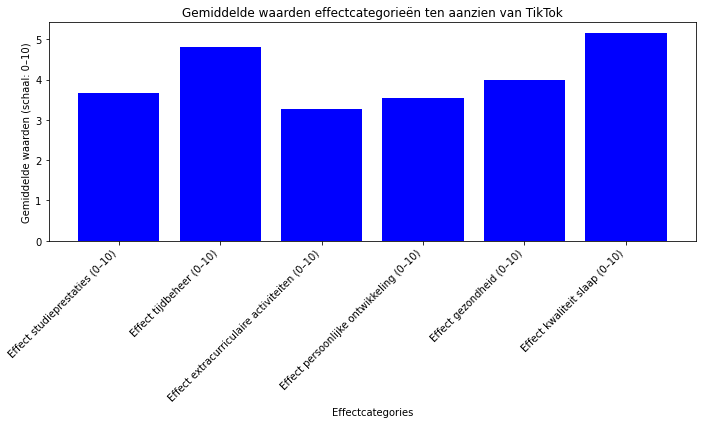

In [19]:

benodigde_kolommen = [
    'Effect studieprestaties (0–10)', 'Effect tijdbeheer (0–10)',
    'Effect extracurriculaire activiteiten (0–10)',
    'Effect persoonlijke ontwikkeling (0–10)', 'Effect gezondheid (0–10)',
    'Effect kwaliteit slaap (0–10)',
]

# zet de kolomwaarden om naar integers
for kolom in benodigde_kolommen:
    enquete[kolom] = pd.to_numeric(enquete[kolom], errors='coerce')

# haalt de waarden uit het dataframe
values = [
    enquete['Effect studieprestaties (0–10)'].mean(),
    enquete['Effect tijdbeheer (0–10)'].mean(),
    enquete['Effect extracurriculaire activiteiten (0–10)'].mean(),
    enquete['Effect persoonlijke ontwikkeling (0–10)'].mean(),
    enquete['Effect gezondheid (0–10)'].mean(),
    enquete['Effect kwaliteit slaap (0–10)'].mean(),
]

# creëert een staafdiagram
plt.figure(figsize=(10, 6))
plt.bar(benodigde_kolommen, values, color='blue')

plt.xlabel('Effectcategories')
plt.ylabel('Gemiddelde waarden (schaal: 0–10)')
plt.title('Gemiddelde waarden effectcategorieën ten aanzien van TikTok')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


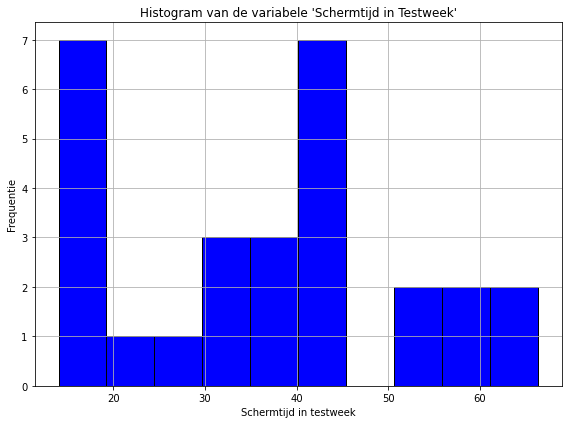

In [20]:

# creëert een histogram van de variabele 'Schermtijd testweek'
plt.figure(figsize=(8, 6))
plt.hist(enquete['Schermtijd testweek'], bins=10, color='blue', edgecolor='black')

plt.xlabel('Schermtijd in testweek')
plt.ylabel('Frequentie')
plt.title("Histogram van de variabele 'Schermtijd in Testweek'")

plt.grid(True)
plt.tight_layout()

plt.show()


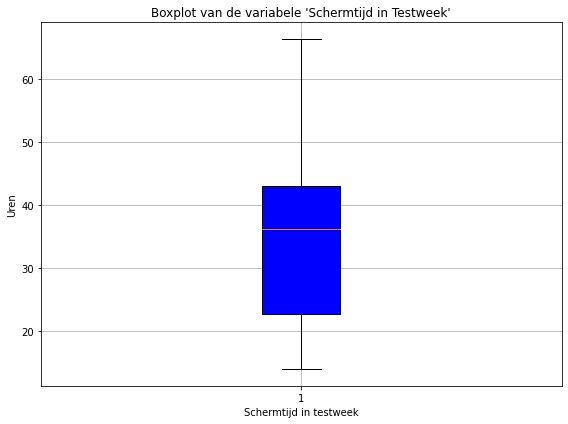

In [21]:

# creëert een boxplot van de variabele 'Schermtijd testweek'
plt.figure(figsize=(8, 6))
bp = plt.boxplot(enquete['Schermtijd testweek'], patch_artist=True)

# verandert de boxplotkleuren
colors = ['lightblue']
for box in bp['boxes']:
    box.set(facecolor='blue')

# definiëert de labels en titel
plt.xlabel('Schermtijd in testweek')
plt.ylabel('Uren')
plt.title("Boxplot van de variabele 'Schermtijd in Testweek'")

plt.grid(True)
plt.tight_layout()

plt.show()



In [22]:

# berekent de productiviteit door het gemiddelde van de deelfactoren te berekenen
enquete['Productiviteit'] = (enquete['Effect studieprestaties (0–10)'] + enquete['Effect tijdbeheer (0–10)']\
+ enquete['Effect extracurriculaire activiteiten (0–10)'] + enquete['Effect persoonlijke ontwikkeling (0–10)']\
+ enquete['Effect gezondheid (0–10)'] + enquete['Effect kwaliteit slaap (0–10)']) / 6


## Een antwoord op de onderzoeksvraag

In [23]:

# slaat de data van de vorige enquête op in een nieuwe lijst
productiviteit_enquete1 = [
    '7', '4', '4', '8', '8', '5', '6', '8', '5', '7', '8',
    '3', '6', '7', '7', '6', '5', '6', '3', '6.5', '6', '7',
    '7', '10', '8', '7'
]

productiviteit_enquete1 = [float(waarde) for waarde in productiviteit_enquete1]

# past de data aan voor de t-toets
productiviteit_enquete2 = [
    0.500000, 3.166667, 3.833333, 3.666667, 2.000000,
    5.833333, 5.333333, 2.666667, 4.166667, 8.166667,
    2.500000, 3.333333, 3.500000, 6.333333, 
    3.9285714285714284, 3.9285714285714284 ,3.9285714285714284,  # vult de ontbrekende waarden op met het gemiddelde
    3.9285714285714284, 3.9285714285714284, 3.9285714285714284,
    3.9285714285714284, 3.9285714285714284, 3.9285714285714284,
    3.9285714285714284, 3.9285714285714284, 3.9285714285714284  
]

# voert de t-toets uit
t_waarde, p_waarde = ttest_ind(productiviteit_enquete1, productiviteit_enquete2, equal_var=False)

# print de resultaten
print(f"t-waarde: {t_waarde:.3f}")
print(f"p-waarde: {p_waarde:.3f}")

t-waarde: 5.601
p-waarde: 0.000
